# Walmart Case Study
### - Akhilesh Jangid

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [2]:
# Importing all the required libraries. 
import pandas as pd, numpy as np, math
import seaborn as sns, matplotlib.pyplot as plt, scipy.stats as stats
from scipy.stats import norm, binom, poisson

In [3]:
data = pd.read_csv("Walmart.csv_1641285094.txt")

In [4]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [9]:
shape = data.shape
print(f"No of Rows : {shape[0]} \n No)

(550068, 10)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [24]:
# Cahnging the data type of categorical columns.
data["Occupation"] = data["Occupation"].astype(object)
data["Marital_Status"] = data["Marital_Status"].astype(object)
data["Product_Category"] = data["Product_Category"].astype(object)

In [25]:
# Checking if data type has been changed or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [26]:
data.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [27]:
# Checking for null values in any column.
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Non-Graphical Analysis:-

In [28]:
Gender_count = data["Gender"].value_counts()
Gender_percentage = data["Gender"].value_counts(normalize = True)*100
print(f"Gender Count : \n{Gender_count} \n\nGender Percentage : \n{Gender_percentage}")

Gender Count : 
M    414259
F    135809
Name: Gender, dtype: int64 

Gender Percentage : 
M    75.310507
F    24.689493
Name: Gender, dtype: float64


In [29]:
Age_count = data["Age"].value_counts()
Age_percentage = data["Age"].value_counts(normalize = True)*100
print(f"Age Count : \n{Age_count} \n\nAge Percentage : \n{Age_percentage}")

Age Count : 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64 

Age Percentage : 
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64


In [30]:
Occupation_count = data["Occupation"].value_counts()
Occupation_percentage = data["Occupation"].value_counts(normalize = True)*100
print(f"Occupation Count : \n{Occupation_count} \n\nOccupation Percentage : \n{Occupation_percentage}")

Occupation Count : 
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64 

Occupation Percentage : 
4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64


In [31]:
City_count = data["City_Category"].value_counts()
City_percentage = data["City_Category"].value_counts(normalize = True)*100
print(f"City Count : \n{City_count} \n\nCity Percentage : \n{City_percentage}")

City Count : 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64 

City Percentage : 
B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64


In [438]:
Stay_in_year_count = data["Stay_In_Current_City_Years"].value_counts()
Stay_in_year_percentage = data["Stay_In_Current_City_Years"].value_counts(normalize = True)*100
print(f"Stay_In_Current_City_Years Count : \n{Stay_in_year_count} \n\nStay_In_Current_City_Years Percentage : \n{Stay_in_year_percentage}")

Stay_In_Current_City_Years Count : 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64 

Stay_In_Current_City_Years Percentage : 
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64


In [33]:
Marital_status_count = data["Marital_Status"].value_counts()
Marital_status_percentage = data["Marital_Status"].value_counts(normalize = True)*100
print(f"Marital Status Count : \n{Marital_status_count} \n\nMarital Status Percentage : \n{Marital_status_percentage}")

Marital Status Count : 
0    324731
1    225337
Name: Marital_Status, dtype: int64 

Marital Status Percentage : 
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64


In [34]:
Product_cat_count = data["Product_Category"].value_counts()
Product_cat_percentage = data["Product_Category"].value_counts(normalize = True)*100
print(f"Product Category Count : \n{Product_cat_count} \n\nProduct Category Percentage : \n{Product_cat_percentage}")

Product Category Count : 
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64 

Product Category Percentage : 
5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64


In [117]:
data.groupby("Product_Category")["Purchase"].sum().sort_values(ascending = False)

Product_Category
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
20        944727
19         59378
Name: Purchase, dtype: int64

## Visual Analysis ( Uni-Variate and Bi-Variate ):- 

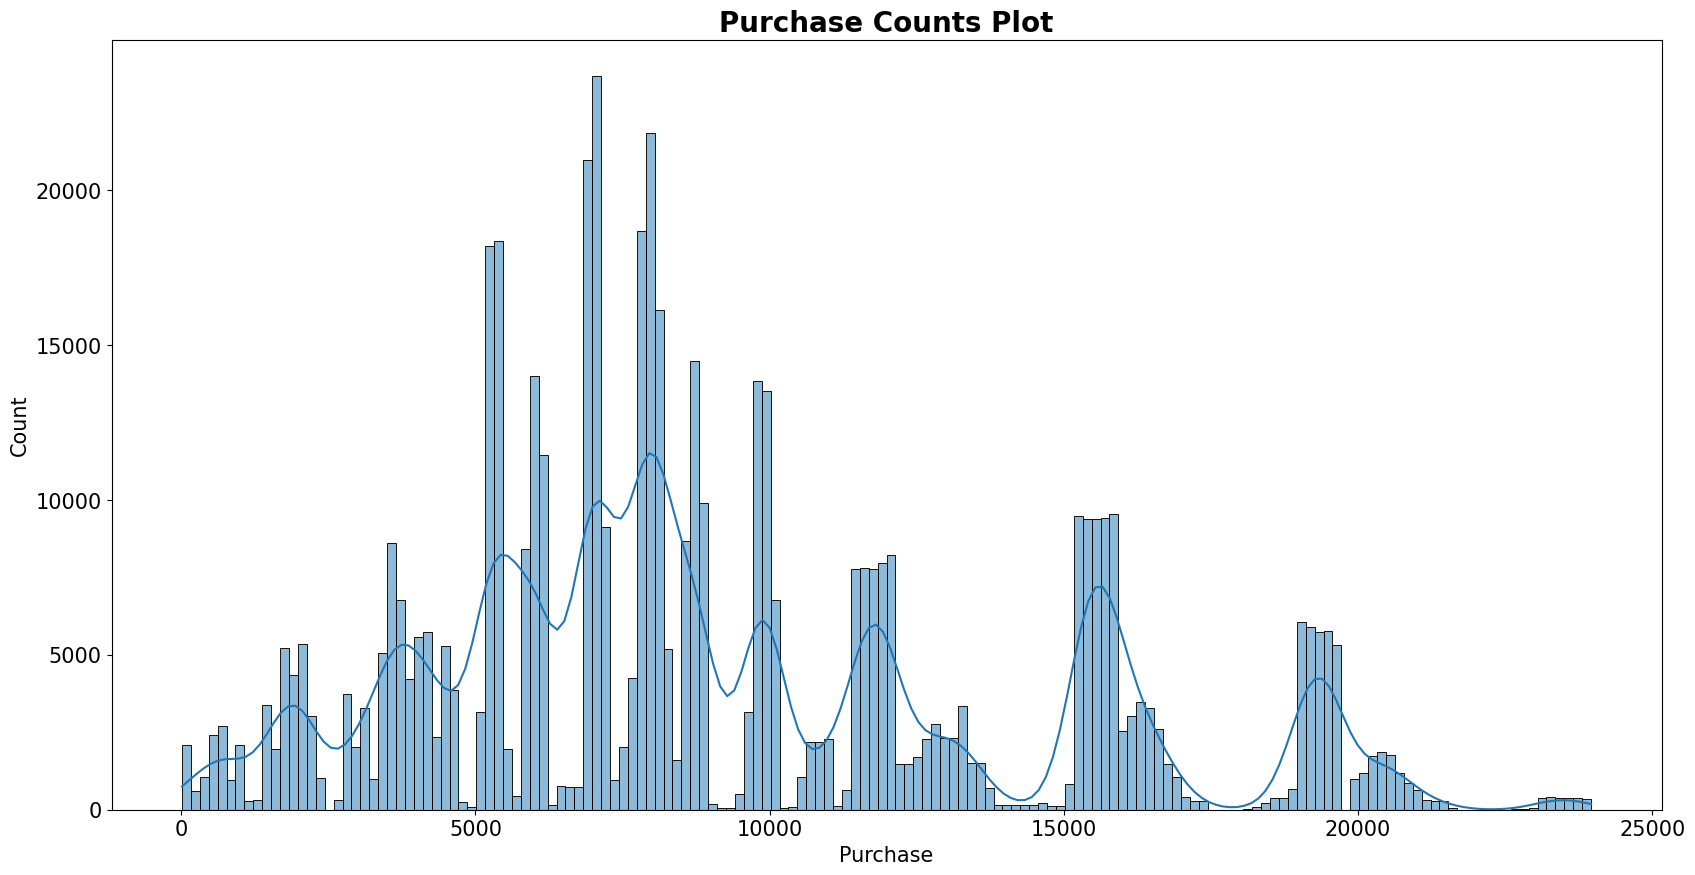

In [35]:
plt.figure(figsize = (20,10))
sns.histplot(data = data, x = "Purchase", kde = True)
plt.xlabel("Purchase", fontsize = "15")
plt.ylabel("Count", fontsize = "15")
plt.xticks(fontsize = "15")
plt.yticks(fontsize = "15")
plt.title("Purchase Counts Plot", fontsize = "20", fontweight = "bold")
plt.show()

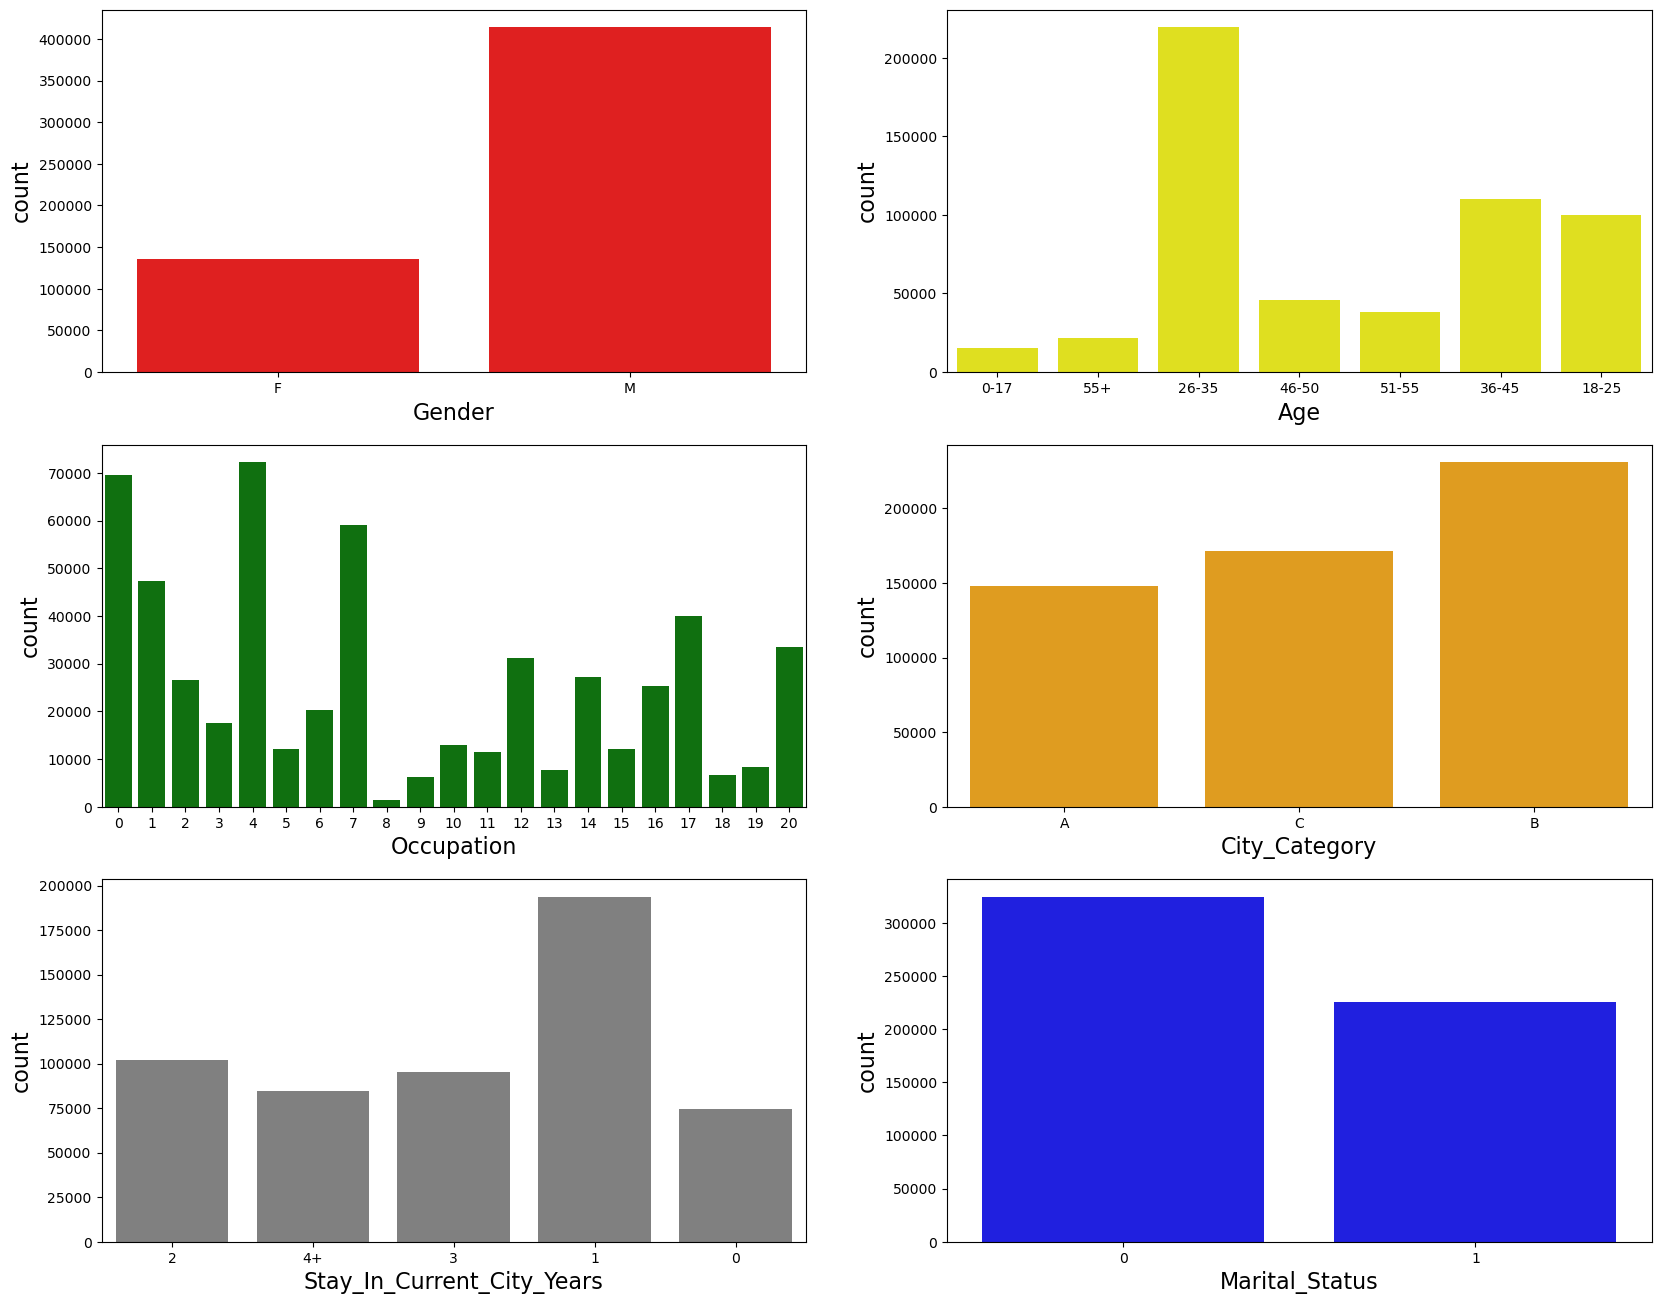

In [36]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (20,16))
sns.countplot(data = data, x = "Gender", ax = axis[0,0], color = "red")
sns.countplot(data = data, x = "Age", ax = axis[0,1], color = "yellow")
sns.countplot(data = data, x = "Occupation", ax = axis[1,0], color = "green")
sns.countplot(data = data, x = "City_Category", ax = axis[1,1], color = "orange")
sns.countplot(data = data, x = "Stay_In_Current_City_Years", ax = axis[2,0], color = "grey")
sns.countplot(data = data, x = "Marital_Status", ax = axis[2,1], color = "blue")
for ax in axis.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize="16")  # Change x label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize="16")  # Change y label font size

# Show the plots
plt.show()

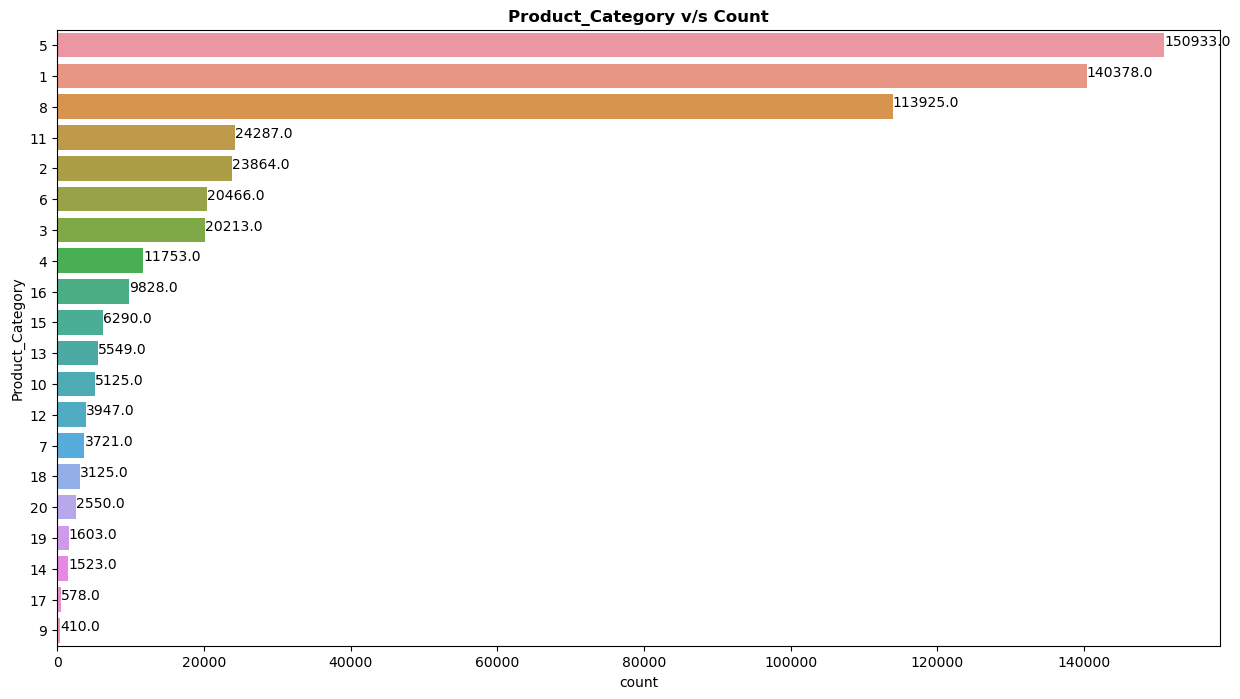

In [37]:
plt.figure(figsize = (15,8))
ax = sns.countplot(data = data, y = "Product_Category", order = data["Product_Category"].value_counts().index)
plt.title("Product_Category v/s Count", fontweight = "bold")

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() + 0.5, p.get_y() + p.get_height() / 2), fontsize=10, color='black')

plt.show()

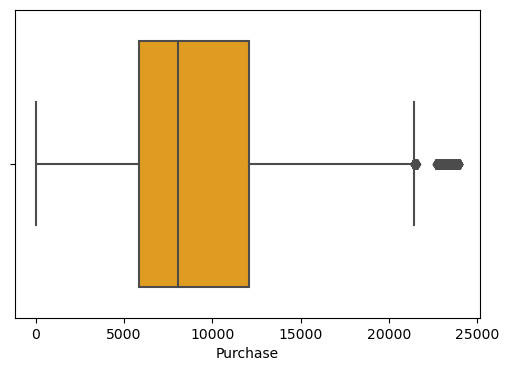

In [38]:
# Outlier Detection using boxplot
plt.figure(figsize = (6,4))
sns.boxplot(data = data, x = "Purchase", color = "orange")
plt.show()

In [64]:
# Finding outliers in Purchase column using pandas

Purchase_data = data["Purchase"]
Q1 = Purchase_data.quantile(0.25)
Q3 = Purchase_data.quantile(0.75)
IQR = Q3 - Q1

LW = Q1 - (1.5 * IQR) # Lower Whisker
UW = Q3 + (1.5 * IQR) # Upper Whisker

outliers_mask = (Purchase_data < LW) | (Purchase_data > UW)
outliers = Purchase_data[outliers_mask]

num_outliers = len(outliers)

# Get the minimum and maximum values of outliers
min_outlier = outliers.min()
max_outlier = outliers.max()

# Print the results
print(f"Number of outliers: {num_outliers}")
print(f"Minimum outlier value: {min_outlier}")
print(f"Maximum outlier value: {max_outlier}")

Number of outliers: 2677
Minimum outlier value: 21401
Maximum outlier value: 23961


### Pie Chart Analysis

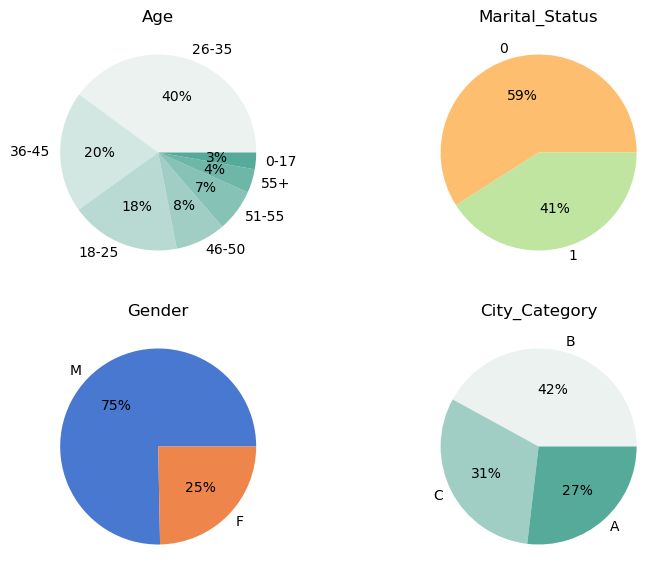

In [68]:
age_color = sns.color_palette("light:#5A9", len(data["Age"].unique()))
Marital_color = sns.color_palette("Spectral", len(data["Marital_Status"].unique()))
gender_color = sns.color_palette("muted", len(data["Gender"].unique()))
city_color = sns.color_palette("light:#5A9", len(data["City_Category"].unique()))


fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (9,7))

Age_percent = data["Age"].value_counts(normalize = True)
axis[0,0].pie(x = Age_percent.values, labels = Age_percent.index, autopct = "%.0f%%", colors =age_color)
axis[0,0].set_title("Age")

Marital_percent = data["Marital_Status"].value_counts(normalize = True)
axis[0,1].pie(x = Marital_percent.values, labels = Marital_percent.index,autopct = "%.0f%%", colors = Marital_color)
axis[0,1].set_title("Marital_Status")

Gender_percent = data["Gender"].value_counts(normalize = True)
axis[1,0].pie(x = Gender_percent.values, labels = Gender_percent.index, autopct = "%.0f%%", colors = gender_color)
axis[1,0].set_title("Gender")


City_percent = data["City_Category"].value_counts(normalize = True)
axis[1,1].pie(x = City_percent.values, labels = City_percent.index, autopct = "%.0f%%", colors = city_color)
axis[1,1].set_title("City_Category")

plt.show()

### Bi-Variate Analysis
Analyzing the variation in purchases with the following,
1. Gender vs Purchase
2. Martial_Status vs Purchase
3. Age vs Purchase
4. City_Category vs Purchase

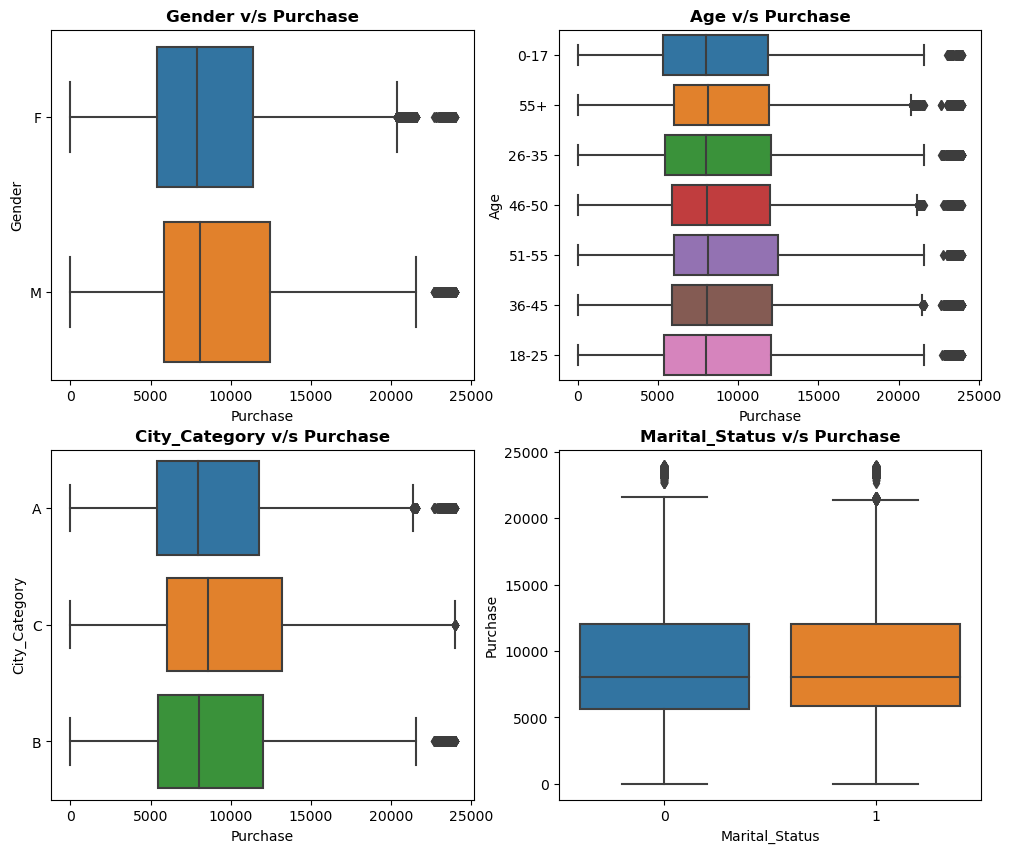

In [69]:
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))

sns.boxplot(data = data, y = "Gender", x = "Purchase", ax = axis[0,0])
axis[0,0].set_title("Gender v/s Purchase", fontweight = "bold")

sns.boxplot(data = data, y = "Age", x = "Purchase", ax = axis[0,1])
axis[0,1].set_title("Age v/s Purchase", fontweight = "bold")

sns.boxplot(data = data, y = "City_Category", x = "Purchase", ax = axis[1,0])
axis[1,0].set_title("City_Category v/s Purchase", fontweight = "bold")

sns.boxplot(data = data, x = "Marital_Status", y = "Purchase", ax = axis[1,1])
axis[1,1].set_title("Marital_Status v/s Purchase", fontweight = "bold")

plt.show()

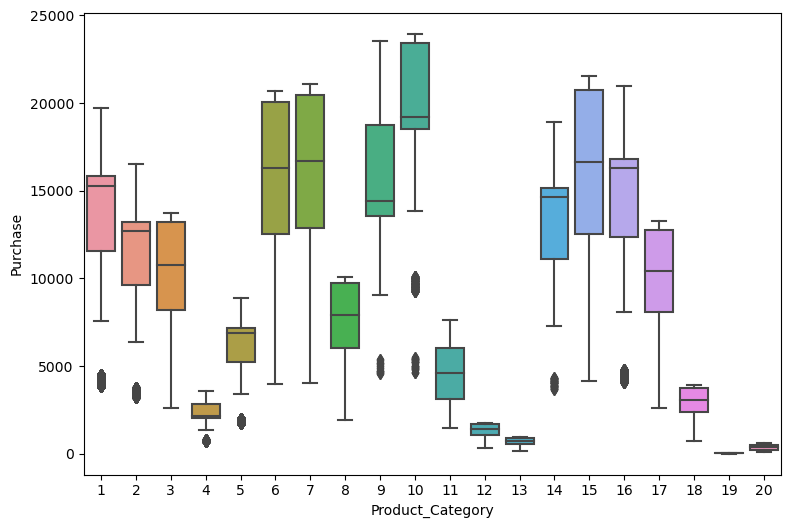

In [110]:
plt.figure(figsize = (9,6))
sns.boxplot(data = data, x = "Product_Category", y = "Purchase")
plt.show()

### Are women spending more money per transaction than men? Why or Why not? 

In [102]:
# Checking this using Hypothesis testing for complete data.
from scipy.stats import ttest_ind
#Ho: There is no significant difference in purchase distributions between males and females.
#Ha: There is a significant difference in purchase distributions between males and females.

# Extract the purchase values for males (M) and females (F)
purchase_male = data[data["Gender"] == "M"]["Purchase"].values
purchase_female = data[data["Gender"] == "F"]["Purchase"].values

# Perform a two-sided t-test
t_stat, p_value = ttest_ind(purchase_male, purchase_female, alternative="two-sided")

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the difference is statistically significant (common significance level is 0.05)
if p_value < 0.05:
    print("There is a significant difference in purchase distributions between males and females.")
else:
    print("There is no significant difference in purchase distributions between males and females.")


T-statistic: 44.837957934353966
P-value: 0.0
There is a significant difference in purchase distributions between males and females.


In [98]:
# Median will be a better approach as Purchase column have potential outliers. 
data.groupby("Gender")["Purchase"].median()

Gender
F    7914.0
M    8098.0
Name: Purchase, dtype: float64

In [99]:
data.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [366]:
agg_data = data.groupby(["User_ID", "Gender"])[["Purchase"]].agg({'Purchase' : ['sum', 'mean']})
agg_data = agg_data.reset_index()
agg_data = agg_data.sort_values(by = ("Purchase", "sum") , ascending = False)
print("Top 10 purchase")
agg_data.head(10)

Top 10 purchase


User_ID Gender  Purchase              
                           sum          mean
4166  1004277      M  10536909  10762.930541
1634  1001680      M   8699596   8479.138402
2831  1002909      M   7577756  10553.977716
1885  1001941      M   6817493   7591.863029
416   1000424      M   6573609   9472.059078
4335  1004448      M   6566245  11419.556522
5683  1005831      M   6512433   8957.954608
981   1001015      M   6511314   8799.072973
3297  1003391      M   6477160   9279.598854
1142  1001181      M   6387961   7410.627610

In [367]:
Gender_wise_count=agg_data['Gender'].value_counts()
print(f'Each gender wise count : \n{Gender_wise_count}')

Each gender wise count : 
M    4225
F    1666
Name: Gender, dtype: int64


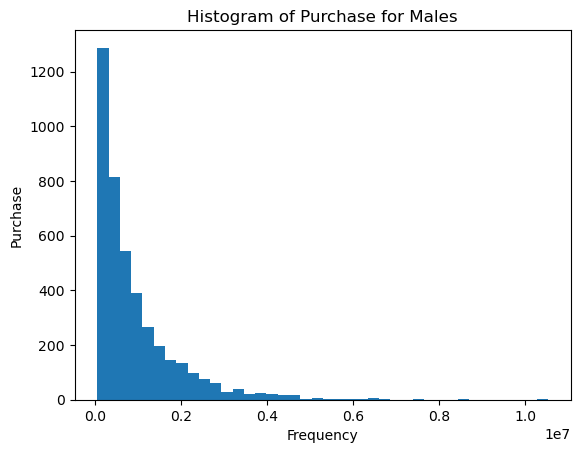

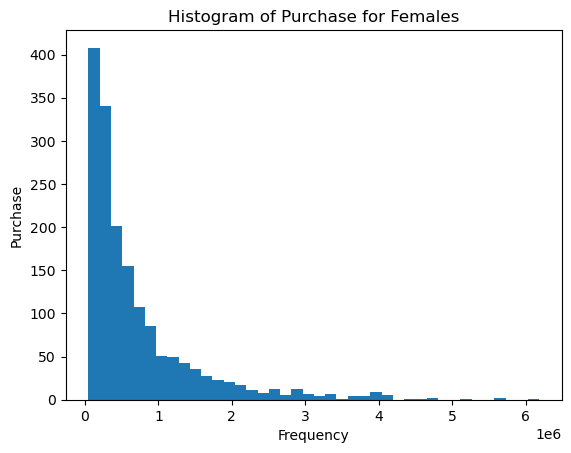

In [368]:
# MALE data representation through a histogram
male_data = agg_data[agg_data['Gender']=='M'][('Purchase', 'sum')]
plt.hist(male_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Males')
plt.show()

# FEMALE data representation through a histogram
female_data = agg_data[agg_data['Gender']=='F'][('Purchase', 'sum')]
plt.hist(female_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Females')
plt.show()

In [369]:
male_avg = agg_data[agg_data['Gender']=='M'][('Purchase', 'mean')].mean().round(2)
female_avg = agg_data[agg_data['Gender']=='F'][('Purchase', 'mean')].mean().round(2)
print(f"Male customer average purchase per transaction : {male_avg}")
print(f"Female customer average purchase per transaction : {female_avg}")

Male customer average purchase per transaction : 9806.87
Female customer average purchase per transaction : 8965.2


In [370]:
male_avg_total = agg_data[agg_data['Gender']=='M'][('Purchase', 'sum')].mean().round(2)
female_avg_total = agg_data[agg_data['Gender']=='F'][('Purchase', 'sum')].mean().round(2)
print(f"Male customer average purchase Aggregate : {male_avg_total}")
print(f"Female customer average purchase Aggregate : {female_avg_total}")

Male customer average purchase Aggregate : 925344.4
Female customer average purchase Aggregate : 712024.39


## Q) Confidence intervals and distribution of the mean of the expenses by female and male customers 

### Note :- From now onwards for each analysis we'll have 2 different approaches and both have their own benifits. 

    1) Sum Approach:- 
        step (i) - Group by User_id, Gender. 
        step (ii) - Then use sum for Purchase Column.
        step(iii) - Taking mean of all the sums using random sampling technique.
        From this approach we'll get Sum of amount spend by each user On Black Friday, average amount spend by any particular user on black friday. 
        
    2) Mean Approach :- 
        step (i) - Group by User_id, Gender. 
        step (ii) - Then use mean for Purchase Column.
        step(iii) - Taking mean of all the means using random sampling technique.
        From this approach we'll get Average of amount per transaction spend by each user On Black Friday, average amount per transaction spend by any particular user on black friday. 

## Sum approach

In [222]:
# Creating a new data frame
agg_data2 = data.groupby(["User_ID", "Gender"])[["Purchase"]].sum()
agg_data2 = agg_data2.reset_index()
agg_data2

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [225]:
# Creating male female seperate data frame
male_agg2 = agg_data2[agg_data2["Gender"] == "M"]
female_agg2 = agg_data2[agg_data2["Gender"] == "F"]

In [248]:
# Creating male female mean samples
male_sample = 3000
female_sample = 1250
num_repetition = 1000

male_means = []
female_means = []

for i in range(num_repetition):
    male_mean = male_agg2.sample(male_sample, replace = True)["Purchase"].mean() 
    female_mean = female_agg2.sample(female_sample, replace = True)["Purchase"].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

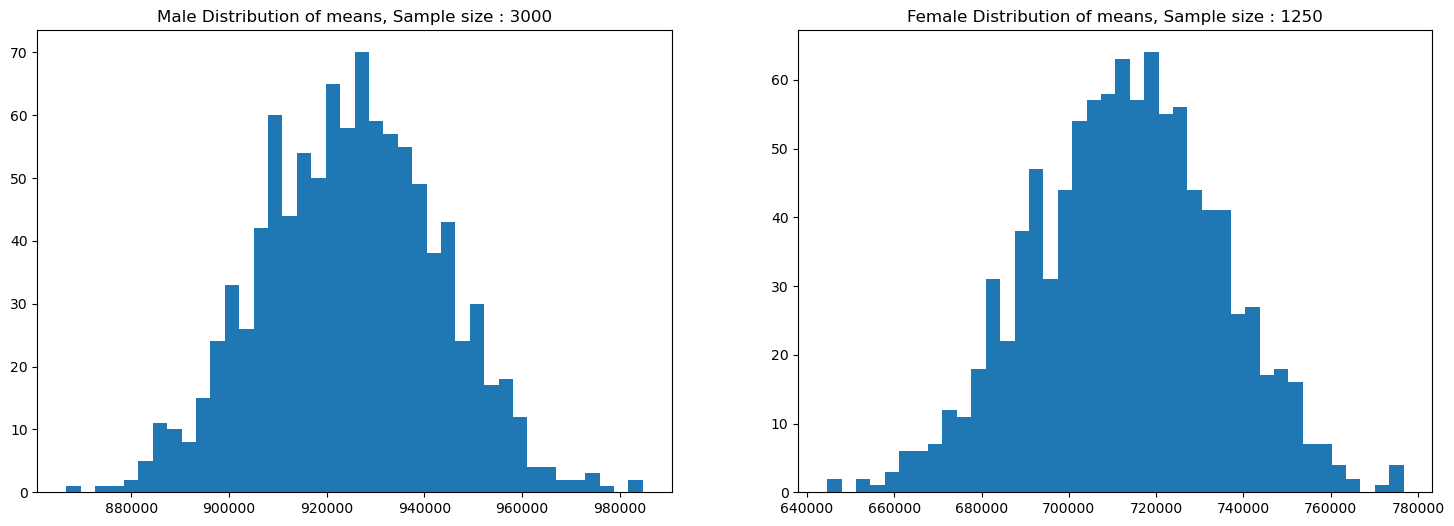

In [256]:
# Plotting a hist plot to check the distribution for male and female sample means.

fig, axis = plt.subplots(nrows = 1, ncols =2, figsize = (18,6))

axis[0].hist(male_means, bins = 40)
axis[0].set_title("Male Distribution of means, Sample size : 3000")

axis[1].hist(female_means, bins = 40)
axis[1].set_title("Female Distribution of means, Sample size : 1250")
plt.show()

In [295]:
print(f"Random Sample Male Customer mean : {np.mean(male_means).round(2)}")
print(f"Random Sample Female Customer mean : {np.mean(female_means).round(2)}\n")

male_data_mean = male_agg2["Purchase"].mean().round(2)
male_data_std = np.round(male_agg2["Purchase"].std(),2)
print(f"Main dataframe Male Customer mean : {male_data_mean}")
print(f"Main dataframe Male Customer STD : {male_data_std}\n")

female_data_mean = female_agg2["Purchase"].mean().round(2)
female_data_std = np.round(female_agg2["Purchase"].std(),2)
print(f"Main dataframe Female Customer mean : {female_data_mean}")
print(f"Main dataframe Female Customer STD : {female_data_std}")

Random Sample Male Customer mean : 924930.66
Random Sample Female Customer mean : 712910.83

Main dataframe Male Customer mean : 925344.4
Main dataframe Male Customer STD : 985830.1

Main dataframe Female Customer mean : 712024.39
Main dataframe Female Customer STD : 807370.73


### Q) Are confidence intervals of average male and female spending overlapping?

In [310]:
confidence_level = 0.95
# Calculate the margin of error using the z-distribution.
z_critical = norm.ppf((1 + confidence_level) / 2)

male_marginof_error = z_critical * male_data_std / (np.sqrt(male_sample))
male_lower_limit = male_data_mean - male_marginof_error
male_upper_limit = male_data_mean + male_marginof_error
male_confidence_interval = (male_lower_limit, male_upper_limit)
print("Male Confidence Interval : ", male_confidence_interval)

female_marginof_error = z_critical * female_data_std / (np.sqrt(female_sample))
female_lower_limit = female_data_mean - female_marginof_error
female_upper_limit = female_data_mean + female_marginof_error
female_confidence_interval = (female_lower_limit, female_upper_limit)
print("Female Confidence Interval : ", female_confidence_interval)

Male Confidence Interval :  (890067.571167598, 960621.228832402)
Female Confidence Interval :  (667266.8627050003, 756781.9172949997)


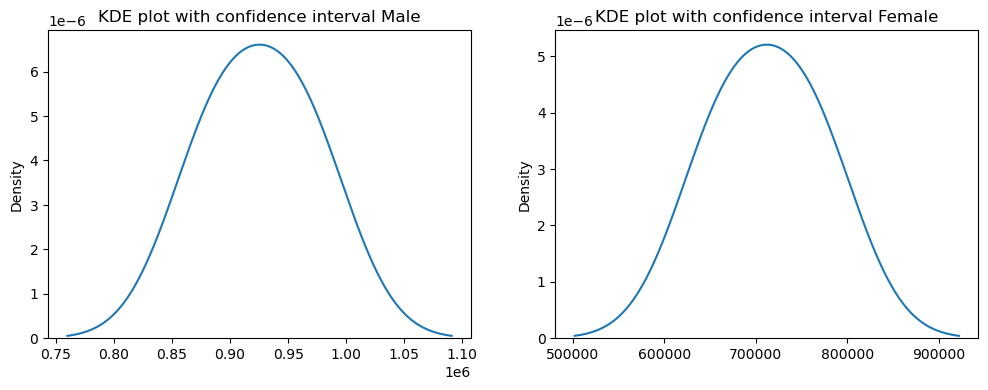

In [334]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.kdeplot(male_confidence_interval, ax = axis[0])
axis[0].set_title("KDE plot with confidence interval Male")

sns.kdeplot(female_confidence_interval, ax = axis[1])
axis[1].set_title("KDE plot with confidence interval Female")
plt.show()

## Per transaction approach Distribution of mean expense.

In [371]:
# Creating a new data frame
agg_data3 = data.groupby(["User_ID", "Gender"])[["Purchase"]].mean()
agg_data3 = agg_data3.reset_index()
agg_data3

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000004,M,14747.714286
4,1000005,M,7745.292453
...,...,...,...
5886,1006036,F,8007.894942
5887,1006037,F,9176.540984
5888,1006038,F,7502.833333
5889,1006039,F,7977.283784


In [372]:
# Creating male female seperate data frame
male_agg3 = agg_data3[agg_data3["Gender"] == "M"]
female_agg3 = agg_data3[agg_data3["Gender"] == "F"]

In [373]:
# Creating male female mean samples
male_sample = 3000
female_sample = 1250
num_repetition = 1000

male_means3 = []
female_means3 = []

for i in range(num_repetition):
    male_mean3 = male_agg3.sample(male_sample, replace = True)["Purchase"].mean() 
    female_mean3 = female_agg3.sample(female_sample, replace = True)["Purchase"].mean()
    
    male_means3.append(male_mean3)
    female_means3.append(female_mean3)

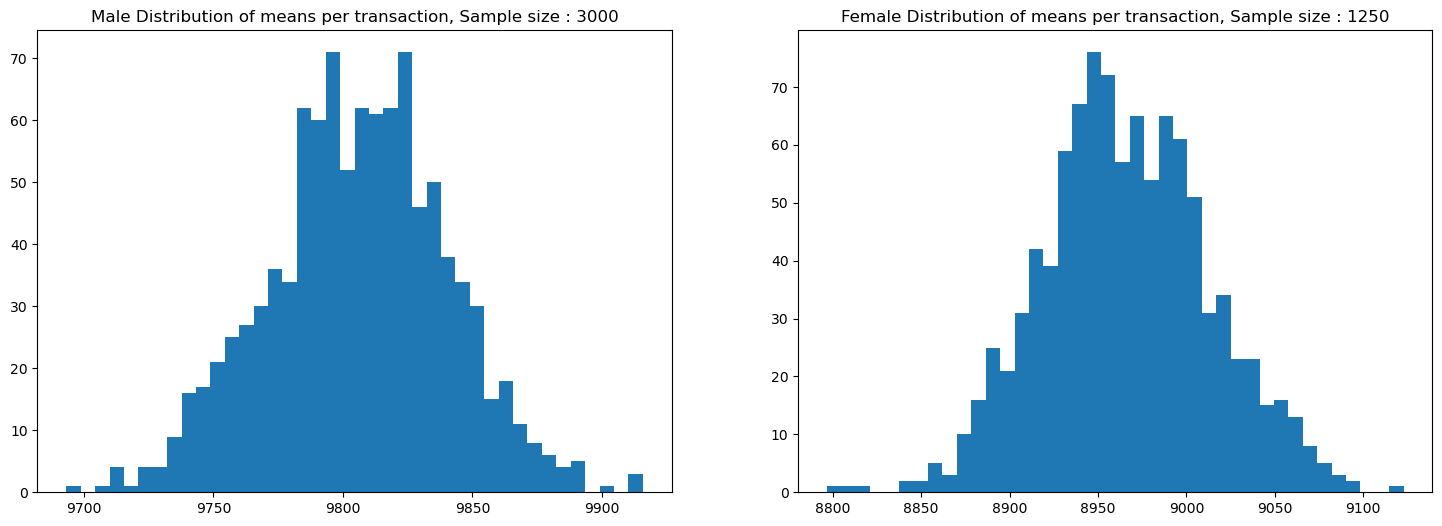

In [374]:
# Plotting a hist plot to check the distribution for male and female sample means.

fig, axis = plt.subplots(nrows = 1, ncols =2, figsize = (18,6))

axis[0].hist(male_means3, bins = 40)
axis[0].set_title("Male Distribution of means per transaction, Sample size : 3000")

axis[1].hist(female_means3, bins = 40)
axis[1].set_title("Female Distribution of means per transaction, Sample size : 1250")
plt.show()

In [375]:
print(f"Random Sample Male Customer mean per transaction : {np.mean(male_means3).round(2)}")
print(f"Random Sample Female Customer mean per transaction : {np.mean(female_means3).round(2)}\n")

male_data_mean3 = male_agg3["Purchase"].mean().round(2)
male_data_std3 = np.round(male_agg3["Purchase"].std(),2)
print(f"Main dataframe Male Customer mean per transaction : {male_data_mean3}")
print(f"Main dataframe Male Customer STD per transaction : {male_data_std3}\n")

female_data_mean3 = female_agg3["Purchase"].mean().round(2)
female_data_std3 = np.round(female_agg3["Purchase"].std(),2)
print(f"Main dataframe Female Customer mean per transaction : {female_data_mean3}")
print(f"Main dataframe Female Customer STD per transaction : {female_data_std3}")

Random Sample Male Customer mean per transaction : 9805.85
Random Sample Female Customer mean per transaction : 8965.77

Main dataframe Male Customer mean per transaction : 9806.87
Main dataframe Male Customer STD per transaction : 1906.4

Main dataframe Female Customer mean per transaction : 8965.2
Main dataframe Female Customer STD per transaction : 1705.62


### Check for confidence interval overlap

In [377]:
confidence_level = 0.95
# Calculate the margin of error using the z-distribution.
z_critical = norm.ppf((1 + confidence_level) / 2)

male_marginof_error3 = z_critical * male_data_std3 / (np.sqrt(male_sample))
male_lower_limit3 = male_data_mean3 - male_marginof_error3
male_upper_limit3 = male_data_mean3 + male_marginof_error3
male_confidence_interval3 = (male_lower_limit3, male_upper_limit3)
print("Male Confidence Interval : ", male_confidence_interval3)

female_marginof_error3 = z_critical * female_data_std3 / (np.sqrt(female_sample))
female_lower_limit3 = female_data_mean3 - female_marginof_error3
female_upper_limit3 = female_data_mean3 + female_marginof_error3
female_confidence_interval3 = (female_lower_limit3, female_upper_limit3)
print("Female Confidence Interval : ", female_confidence_interval3)

Male Confidence Interval :  (9738.651605688354, 9875.088394311648)
Female Confidence Interval :  (8870.646988764509, 9059.753011235493)


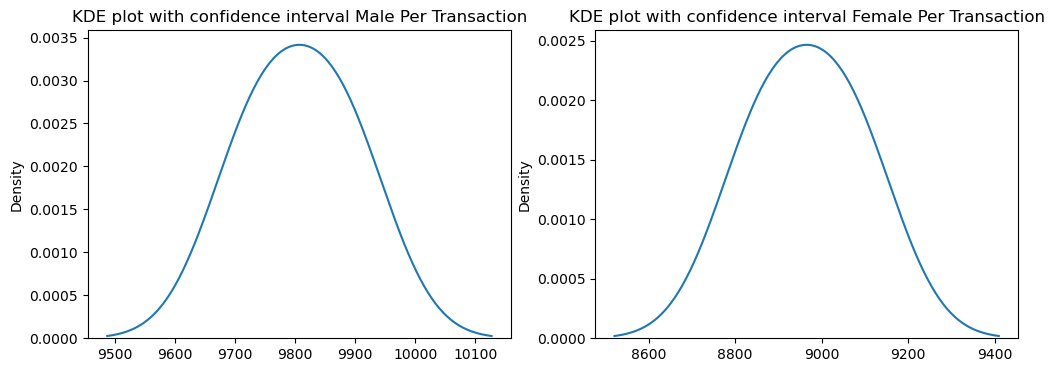

In [378]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.kdeplot(male_confidence_interval3, ax = axis[0])
axis[0].set_title("KDE plot with confidence interval Male Per Transaction")

sns.kdeplot(female_confidence_interval3, ax = axis[1])
axis[1].set_title("KDE plot with confidence interval Female Per Transaction")
plt.show()

## Q) Results when the same activity is performed for Married vs Unmarried  Customers.
## Sum Approach :- 

In [335]:
# Creating a new data frame according to Marital Status
marital_status_data = data.groupby(["User_ID", "Marital_Status"])[["Purchase"]].sum()
marital_status_data = marital_status_data.reset_index()
marital_status_data

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [340]:
# Creating Married Unmarried separate data frame.
unmarried_data = marital_status_data[marital_status_data["Marital_Status"] == 0]
married_data = marital_status_data[marital_status_data["Marital_Status"] == 1]

In [343]:
married_sample = 3000
unmarried_sample = 1500
num_of_rep = 1000

unmarried_means = []
married_means = []

for i in range(num_of_rep):
    unmarried_mean = unmarried_data.sample(unmarried_sample, replace = True)['Purchase'].mean()
    married_mean = married_data.sample(married_sample, replace = True)['Purchase'].mean()
    
    unmarried_means.append(unmarried_mean)
    married_means.append(married_mean)

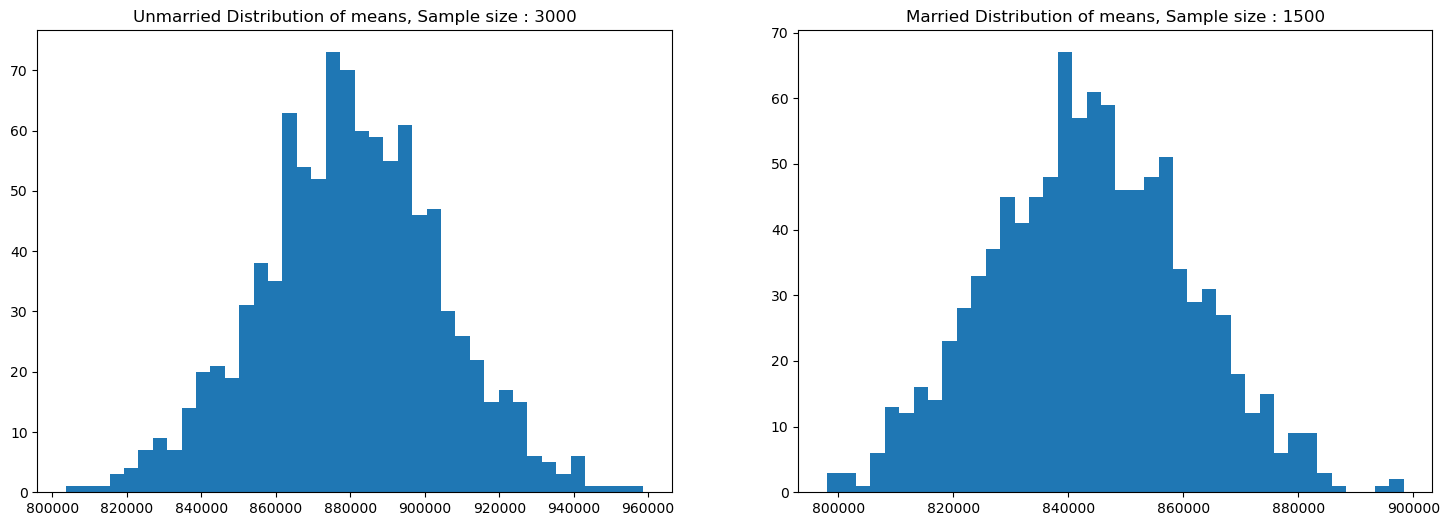

In [357]:
# Plotting a hist plot to check the distribution for male and female sample means.

fig, axis = plt.subplots(nrows = 1, ncols =2, figsize = (18,6))

axis[0].hist(unmarried_means, bins = 40)
axis[0].set_title("Unmarried Distribution of means, Sample size : 3000")

axis[1].hist(married_means, bins = 40)
axis[1].set_title("Married Distribution of means, Sample size : 1500")
plt.show()

In [358]:
print(f"Random Sample Unmarried Customer mean : {np.mean(unmarried_means).round(2)}")
print(f"Random Sample Married Customer mean : {np.mean(married_means).round(2)}\n")

unmarried_data_mean = unmarried_data["Purchase"].mean().round(2)
unmarried_data_std = np.round(unmarried_data["Purchase"].std(),2)
print(f"Main dataframe Unmarried Customer mean : {unmarried_data_mean}")
print(f"Main dataframe Unmarried Customer STD : {unmarried_data_std}\n")

married_data_mean = married_data["Purchase"].mean().round(2)
married_data_std = np.round(married_data["Purchase"].std(),2)
print(f"Main dataframe married Customer mean : {married_data_mean}")
print(f"Main dataframe married Customer STD : {married_data_std}")

Random Sample Unmarried Customer mean : 880110.51
Random Sample Married Customer mean : 843645.91

Main dataframe Unmarried Customer mean : 880575.78
Main dataframe Unmarried Customer STD : 949436.25

Main dataframe married Customer mean : 843526.8
Main dataframe married Customer STD : 935352.12


### Confidence Interval For Marital_Status Column (sum approach)

In [360]:
confidence_level = 0.95
z_critical = norm.ppf((1+confidence_level)/2)

unmarried_marginof_error = z_critical * unmarried_data_std / (np.sqrt(unmarried_sample))
unmarried_lower_limit = unmarried_data_mean - unmarried_marginof_error
unmarried_upper_limit = unmarried_data_mean + unmarried_marginof_error
unmarried_confidence_interval = (unmarried_lower_limit, unmarried_upper_limit)
print("Unmarried Confidence Interval : ", unmarried_confidence_interval)

married_marginof_error = z_critical * married_data_std / (np.sqrt(married_sample))
married_lower_limit = married_data_mean - married_marginof_error
married_upper_limit = married_data_mean + married_marginof_error
married_confidence_interval = (married_lower_limit, married_upper_limit)
print("Married Confidence Interval : ", married_confidence_interval)

Unmarried Confidence Interval :  (832528.5593105799, 928623.0006894202)
Married Confidence Interval :  (810056.2692916514, 876997.3307083487)


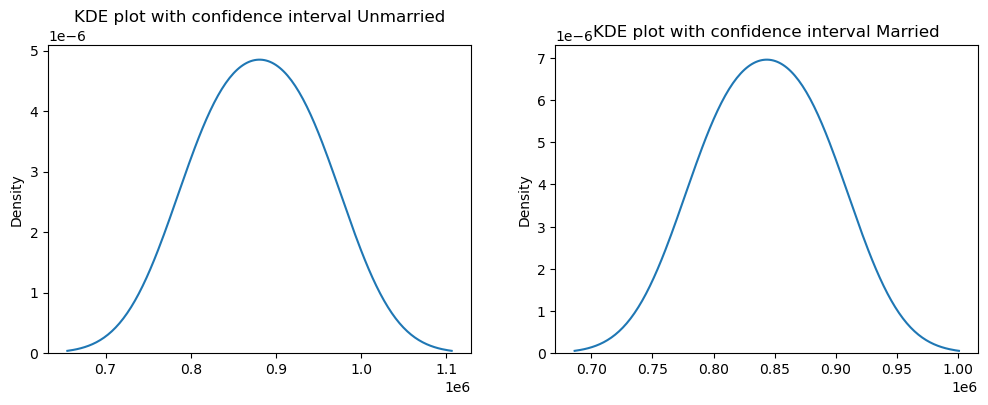

In [361]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.kdeplot(unmarried_confidence_interval, ax = axis[0])
axis[0].set_title("KDE plot with confidence interval Unmarried")

sns.kdeplot(married_confidence_interval, ax = axis[1])
axis[1].set_title("KDE plot with confidence interval Married")
plt.show()

# Per Transaction Approach :- 

In [379]:
# Creating a new data frame according to Marital Status
marital_status_data2 = data.groupby(["User_ID", "Marital_Status"])[["Purchase"]].mean()
marital_status_data2 = marital_status_data2.reset_index()
marital_status_data2

,User_ID,Marital_Status,Purchase
0,1000001,0,9545.514286
1,1000002,0,10525.610390
2,1000003,0,11780.517241
3,1000004,1,14747.714286
4,1000005,1,7745.292453
...,...,...,...
5886,1006036,1,8007.894942
5887,1006037,0,9176.540984
5888,1006038,0,7502.833333
5889,1006039,1,7977.283784


In [380]:
# Creating Married Unmarried separate data frame.
unmarried_data2 = marital_status_data2[marital_status_data2["Marital_Status"] == 0]
married_data2 = marital_status_data2[marital_status_data2["Marital_Status"] == 1]

In [381]:
married_sample = 3000
unmarried_sample = 1500
num_of_rep = 1000

unmarried_means2 = []
married_means2 = []

for i in range(num_of_rep):
    unmarried_mean2 = unmarried_data2.sample(unmarried_sample, replace = True)['Purchase'].mean()
    married_mean2 = married_data2.sample(married_sample, replace = True)['Purchase'].mean()
    
    unmarried_means2.append(unmarried_mean2)
    married_means2.append(married_mean2)

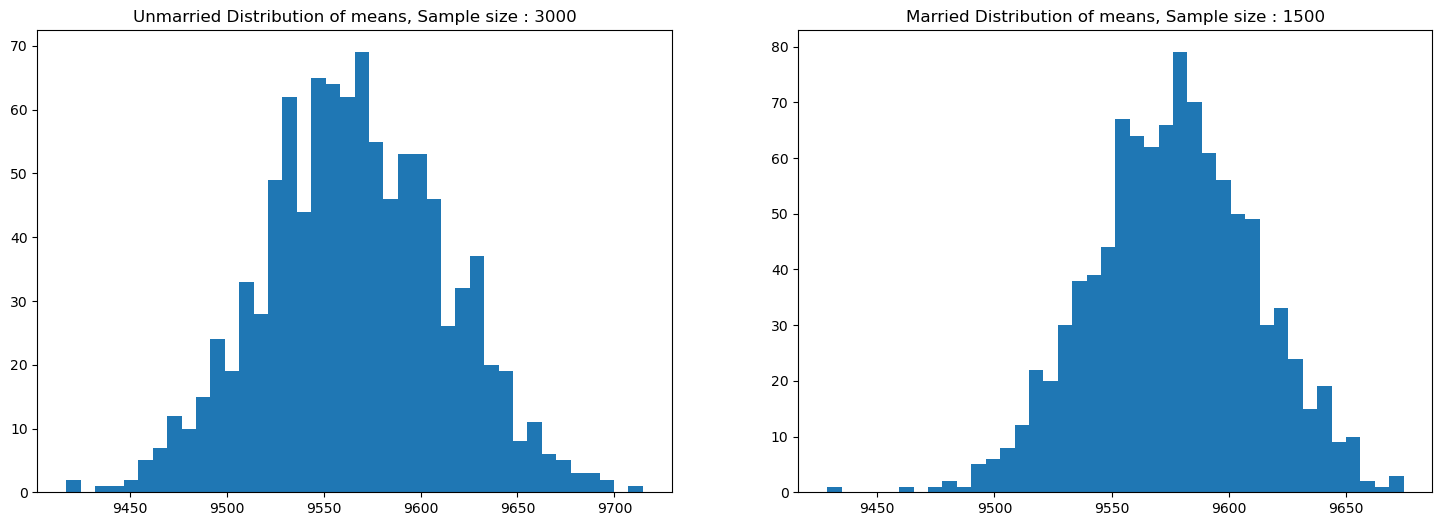

In [383]:
# Plotting a hist plot to check the distribution for male and female sample means.

fig, axis = plt.subplots(nrows = 1, ncols =2, figsize = (18,6))

axis[0].hist(unmarried_means2, bins = 40)
axis[0].set_title("Unmarried Distribution of means, Sample size : 3000")

axis[1].hist(married_means2, bins = 40)
axis[1].set_title("Married Distribution of means, Sample size : 1500")
plt.show()

In [384]:
print(f"Random Sample Unmarried Customer mean per transaction : {np.mean(unmarried_means2).round(2)}")
print(f"Random Sample Married Customer mean per transaction: {np.mean(married_means2).round(2)}\n")

unmarried_data_mean2 = unmarried_data2["Purchase"].mean().round(2)
unmarried_data_std2 = np.round(unmarried_data2["Purchase"].std(),2)
print(f"Main dataframe Unmarried Customer mean per transaction : {unmarried_data_mean2}")
print(f"Main dataframe Unmarried Customer STD per transaction: {unmarried_data_std2}\n")

married_data_mean2 = married_data2["Purchase"].mean().round(2)
married_data_std2 = np.round(married_data2["Purchase"].std(),2)
print(f"Main dataframe married Customer mean per transaction : {married_data_mean2}")
print(f"Main dataframe married Customer STD per transaction : {married_data_std2}")

Random Sample Unmarried Customer mean per transaction : 9566.38
Random Sample Married Customer mean per transaction: 9576.38

Main dataframe Unmarried Customer mean per transaction : 9564.41
Main dataframe Unmarried Customer STD per transaction: 1877.33

Main dataframe married Customer mean per transaction : 9574.96
Main dataframe married Customer STD per transaction : 1907.93


### Confidence Interval For Marital_Status Column (per transaction approach)

In [385]:
confidence_level = 0.95
z_critical = norm.ppf((1+confidence_level)/2)

unmarried_marginof_error2 = z_critical * unmarried_data_std2 / (np.sqrt(unmarried_sample))
unmarried_lower_limit2 = unmarried_data_mean2 - unmarried_marginof_error2
unmarried_upper_limit2 = unmarried_data_mean2 + unmarried_marginof_error2
unmarried_confidence_interval2 = (unmarried_lower_limit2, unmarried_upper_limit2)
print("Unmarried Confidence Interval per transaction : ", unmarried_confidence_interval2)

married_marginof_error2 = z_critical * married_data_std2 / (np.sqrt(married_sample))
married_lower_limit2 = married_data_mean2 - married_marginof_error2
married_upper_limit2 = married_data_mean2 + married_marginof_error2
married_confidence_interval2 = (married_lower_limit2, married_upper_limit2)
print("Married Confidence Interval per transaction : ", married_confidence_interval2)

Unmarried Confidence Interval per transaction :  (9469.405739506608, 9659.414260493391)
Married Confidence Interval per transaction :  (9506.686856347553, 9643.233143652446)


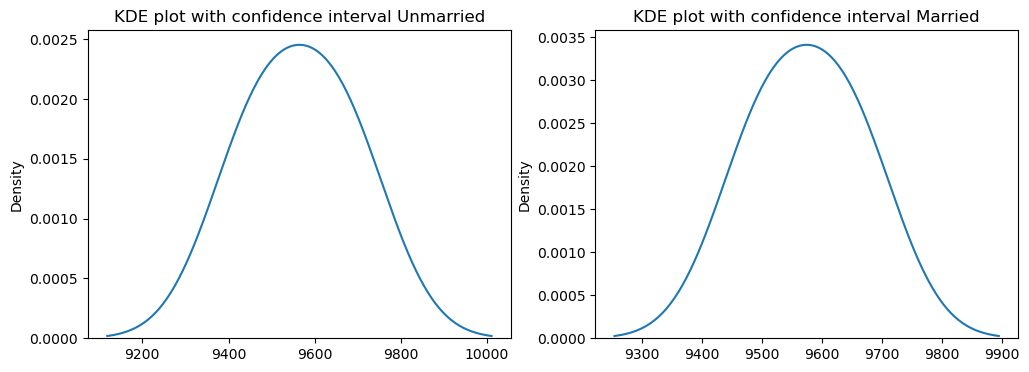

In [386]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.kdeplot(unmarried_confidence_interval2, ax = axis[0])
axis[0].set_title("KDE plot with confidence interval Unmarried")

sns.kdeplot(married_confidence_interval2, ax = axis[1])
axis[1].set_title("KDE plot with confidence interval Married")
plt.show()

## Q) Results when the same activity is performed for Age.

In [429]:

# Step 1: Group the data by age group
age_groups = data.groupby('Age')

# Initialize empty dictionaries to store results
mean_purchase_by_age = {}
sample_means_by_age = {}
confidence_intervals_by_age = {}

# Step 2: Calculate the mean purchase for each age group
for age, group_data in age_groups:
    mean_purchase_by_age[age] = group_data['Purchase'].mean()

# Number of random samples to generate
num_samples = 1000

# Step 3 and 4: Perform random sampling and calculate mean and confidence intervals
for age, group_data in age_groups:
    sample_means = []

    for _ in range(num_samples):
        # Randomly sample with replacement
        sample = np.random.choice(group_data['Purchase'], len(group_data), replace=True)
        sample_means.append(np.mean(sample))

    # Calculate the mean of sample means
    sample_mean = np.mean(sample_means)
    
    # Calculate the confidence interval (95% confidence level)
    confidence_interval = stats.t.interval(0.95, len(sample_means) - 1, loc=sample_mean, scale=stats.sem(sample_means))

    sample_means_by_age[age] = sample_mean
    confidence_intervals_by_age[age] = confidence_interval

for age, mean_purchase in mean_purchase_by_age.items():
    print(f"Age Group: {age}")
    print(f"Mean Purchase: {mean_purchase:.2f}")
    print(f"Sample Mean: {sample_means_by_age[age]:.2f}")
    print(f"Confidence Interval: {confidence_intervals_by_age[age]}")
    print()

Age Group: 0-17
Mean Purchase: 8933.46
Sample Mean: 8934.28
Confidence Interval: (8931.736870254754, 8936.832068826163)

Age Group: 18-25
Mean Purchase: 9169.66
Sample Mean: 9170.51
Confidence Interval: (9169.517767689937, 9171.505708248253)

Age Group: 26-35
Mean Purchase: 9252.69
Sample Mean: 9252.94
Confidence Interval: (9252.277064824766, 9253.593948750722)

Age Group: 36-45
Mean Purchase: 9331.35
Sample Mean: 9331.83
Confidence Interval: (9330.866656820523, 9332.787935454937)

Age Group: 46-50
Mean Purchase: 9208.63
Sample Mean: 9208.27
Confidence Interval: (9206.841081507786, 9209.70615894647)

Age Group: 51-55
Mean Purchase: 9534.81
Sample Mean: 9534.86
Confidence Interval: (9533.260171042986, 9536.449886098386)

Age Group: 55+
Mean Purchase: 9336.28
Sample Mean: 9335.07
Confidence Interval: (9332.883707841154, 9337.255794856019)



In [449]:
print("*" * 115)
print("#" * 115)
print("*" * 115)

*******************************************************************************************************************
###################################################################################################################
*******************************************************************************************************************


# Insights :- 

## Basic Insights:- 

## Uni, bi - Variate Insights :- 

## Are women spending more money per transaction than men?

## When the same activity is performed for Married vs Unmarried Customers.

## When the same activity is performed for Age.

# Recommendations:- 

### 1)Popular Products: 
    Walmart should keep a good stock of the most frequently purchased product with the ID "P00265242." It's a popular product and can potentially attract more customers.

### 2) High-Value Products: 
    Product ID "P00025442" has the highest total purchase amount. Walmart can focus on promoting and stocking similar high-value products to increase sales.

### 3) Age Groups:
    86% of purchases are done by customers whose ages are between 18 and 45. It's essential for Walmart to cater to the needs and preferences of all age groups. Special promotions or product offerings for this age groups can help capture a good customer base of young buyers, which also tends to buy more.

### 4) City Categories: 
    Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.

### 5) Product Categories: 
    Product Category 1 has the highest total purchase amount. Walmart can focus on promoting and stocking products from this category. Should also focus on Category 5,8,11 as they are also important category.

### 6) Gender:
    While the majority of customers are male, Walmart should continue to cater to both male and female customers. Understanding the differences in purchase behavior can help in personalized marketing strategies. Even the data says male customers tends to buy more than female on average.

### 7) Stay in Current City Years: 
    Walmart can offer incentives or loyalty programs to retain customers, especially those who have been in the city for a more extended period, as they can be local residents and gaining a good local customer base is always needed.

### 8) Marital Status: 
    Participation of married unmarried is not too different , walmart can focus on keeping more family oriented products also. Keeping more unmarried related products are also recommended.